<center> 
<h1> <u>EN2550-Assignment 1 </u></h1>
<h1> <u>Intensity Transformations and Neighborhood Filtering </u></h1> 
</center>


***

* Name: B.S.V.W. Munasinghe <br> 
* Index Number: 190397E 

***

* Importing Libraries,

In [5]:
#Importing the libraries 
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import sympy as sy

#To display the figures in the converted PDF/HTML files
%matplotlib inline

***

## Question 1

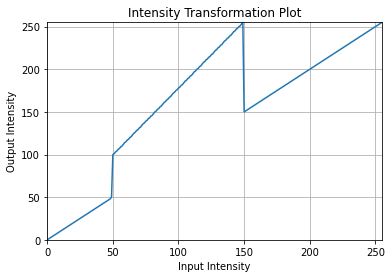

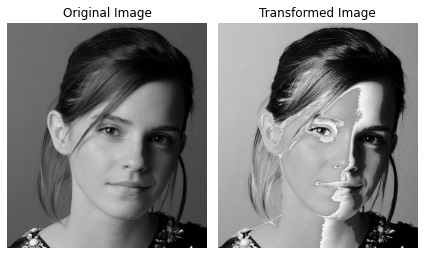

In [2]:
#Creating the transformation array
T1 = np.linspace(0,50,50)
T2 = np.linspace(100,255,100)
T3 = np.linspace(150,255,106)

#Concatenate sub arrays to get the transformation
t = np.concatenate((T1,T2,T3),axis = 0).astype(np.uint8)

#Plot the transformation
fig,ax = plt.subplots()
ax.plot(t)
ax.grid()
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_xlabel("Input Intensity")
ax.set_ylabel("Output Intensity")
ax.set_title("Intensity Transformation Plot")

#Read the image using opencv
img = cv.imread('images/emma_gray.jpg',cv.IMREAD_GRAYSCALE)
assert img is not None

#apply the transformation using lookup table
transformed_img = cv.LUT(img,t)

#display images using matplotlib
plt.rcParams["figure.autolayout"] = True
fig,ax = plt.subplots(1,2)
img_ = cv.cvtColor(img,cv.COLOR_BGR2RGB)
ax[0].axis('off')
ax[0].set_title("Original Image")
ax[0].imshow(img_)

transformed_img_ = cv.cvtColor(transformed_img,cv.COLOR_BGR2RGB)
ax[1].axis('off')
ax[1].set_title("Transformed Image")
ax[1].imshow(transformed_img_)

***

## Question 2

### (a) White Matter

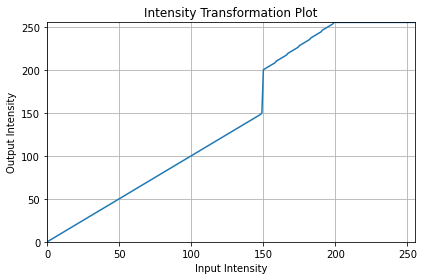

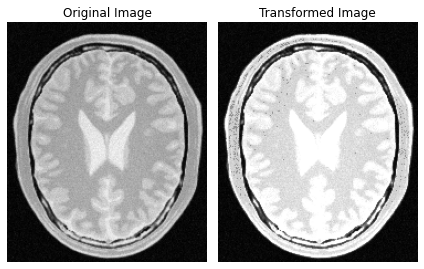

In [5]:
#Creating the transformation array
T1 = np.linspace(0,150,150)
T2 = np.linspace(200,255,50)
T3 = np.linspace(255,255,56)

#Concatenate sub arrays to get the transformation
t = np.concatenate((T1,T2,T3),axis = 0).astype(np.uint8)

#Plot the transformation
fig,ax = plt.subplots()
ax.plot(t)
ax.grid()
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_xlabel("Input Intensity")
ax.set_ylabel("Output Intensity")
ax.set_title("Intensity Transformation Plot")

#Read the image using opencv
img = cv.imread('images/brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert img is not None

#apply the transformation using lookup table
transformed_img = cv.LUT(img,t)

#display images using matplotlib
plt.rcParams["figure.autolayout"] = True
fig,ax = plt.subplots(1,2)
img_ = cv.cvtColor(img,cv.COLOR_BGR2RGB)
ax[0].axis('off')
ax[0].set_title("Original Image")
ax[0].imshow(img_)

transformed_img_ = cv.cvtColor(transformed_img,cv.COLOR_BGR2RGB)
ax[1].axis('off')
ax[1].set_title("Transformed Image")
ax[1].imshow(transformed_img_)

### (b) Gray Matter

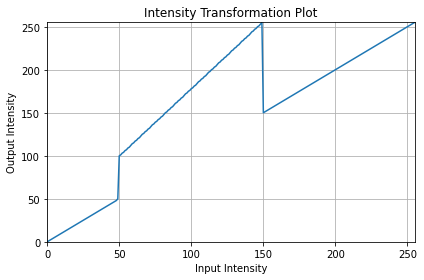

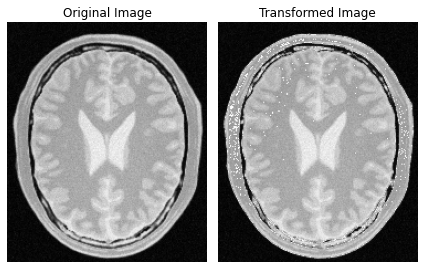

In [4]:
#Creating the transformation array
T1 = np.linspace(0,50,50)
T2 = np.linspace(100,255,100)
T3 = np.linspace(150,255,106)

#Concatenate sub arrays to get the transformation
t = np.concatenate((T1,T2,T3),axis = 0).astype(np.uint8)

#Plot the transformation
fig,ax = plt.subplots()
ax.plot(t)
ax.grid()
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_xlabel("Input Intensity")
ax.set_ylabel("Output Intensity")
ax.set_title("Intensity Transformation Plot")

#Read the image using opencv
img = cv.imread('images/brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert img is not None

#apply the transformation using lookup table
transformed_img = cv.LUT(img,t)

#display images using matplotlib
plt.rcParams["figure.autolayout"] = True
fig,ax = plt.subplots(1,2)
img_ = cv.cvtColor(img,cv.COLOR_BGR2RGB)
ax[0].axis('off')
ax[0].set_title("Original Image")
ax[0].imshow(img_)

transformed_img_ = cv.cvtColor(transformed_img,cv.COLOR_BGR2RGB)
ax[1].axis('off')
ax[1].set_title("Transformed Image")
ax[1].imshow(transformed_img_)

## Question 3

### (a)

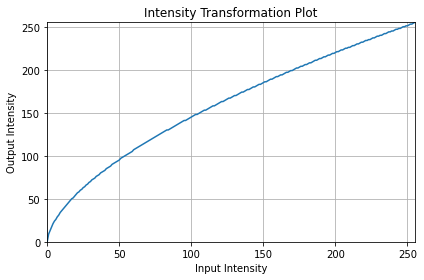

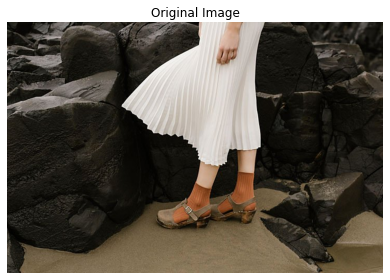

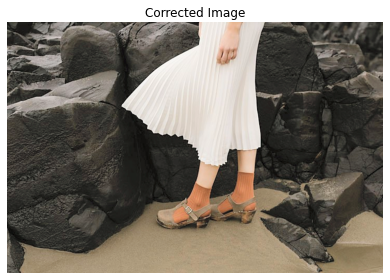

In [36]:
gemma = 0.6
t = np.array([(i/255)**gemma*255 for i in range(0,256)]).astype(np.uint8)

#Plot the transformation
fig,ax = plt.subplots()
ax.plot(t)
ax.grid()
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_xlabel("Input Intensity")
ax.set_ylabel("Output Intensity")
ax.set_title("Intensity Transformation Plot")

#Read the image using opencv
img = cv.imread('images/highlights_and_shadows.jpg',cv.IMREAD_COLOR)
assert img is not None

#Changing the color plane to L*a*b*
img_Lab = cv.cvtColor(img,cv.COLOR_BGR2Lab)
img_L = img_Lab[:,:,0]
img_a = img_Lab[:,:,1]
img_b = img_Lab[:,:,2]

#apply the transformation using lookup table
transformed_L = cv.LUT(img_L,t)

#Get the BGR color plane image back by merging sub layers and convert back to BGR
transformed_img = cv.cvtColor(cv.merge([transformed_L,img_a,img_b]),cv.COLOR_Lab2BGR)

#display images using matplotlib
plt.rcParams["figure.autolayout"] = True
fig,ax = plt.subplots()
img_ = cv.cvtColor(img,cv.COLOR_BGR2RGB)
ax.axis('off')
ax.set_title("Original Image")
ax.imshow(img_)

fig,ax = plt.subplots()
transformed_img_ = cv.cvtColor(transformed_img,cv.COLOR_BGR2RGB)
ax.axis('off')
ax.set_title("Corrected Image")
ax.imshow(transformed_img_)

### (b)

Text(0.5, 1.0, 'Histogram of Corrected Image')

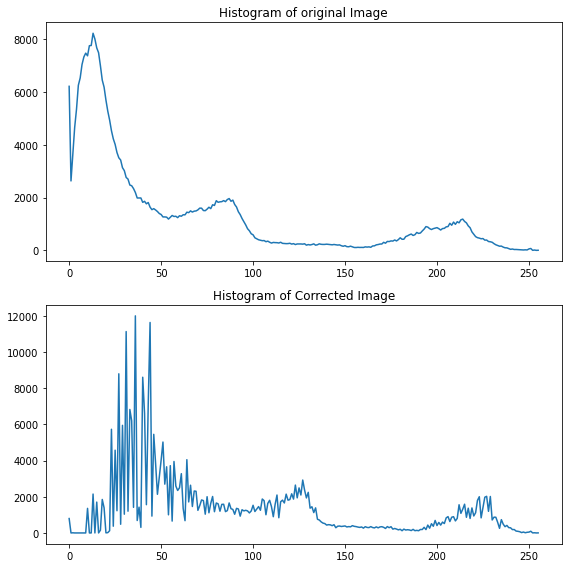

In [35]:
hist_img = cv.calcHist([img],[0],None,[256],[0,256])
hist_gemma_img = cv.calcHist([transformed_img],[0],None,[256],[0,256])

fig,ax = plt.subplots(2,1,figsize=(8,8))
ax[0].plot(hist_img)
ax[0].set_title("Histogram of original Image")
ax[1].plot(hist_gemma_img)
ax[1].set_title("Histogram of Corrected Image")